# Python Machine Learning In Biology:
# Logistic Regression

The scikit-learn API has a user-friendly interface and highly optimized implementation of several classification algorithms. It also has a lot of great preprocessing functions and tuning functions (which we'll visit later).

In [14]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

# Logistic Regression

Run a logistic regression on the diabetes dataset. 

#### Import libraries and read in data.

In [20]:
import pandas as pd

In [21]:
pima = pd.read_csv("diabetes.csv")

In [22]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Select features

Divide the given columns into two types of variables dependent (target variable) and independent variable (feature variables).

In [23]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

#### Splitting Data

Divide dataset into testing and training datasets so we can evaluate the model's performance. 

We'll use the function `train_test_split()`. You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [24]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

#### Model Development and Prediction

First, we need to import the `Logistic Regression` module and create a Logistic Regression classifier object using `LogisticRegression()` function.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [25]:
# import the class
from sklearn.linear_model import LogisticRegression

In [26]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [27]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred=logreg.predict(X_test)

#### Model evaluation using the confusion matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. 

In [29]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2 by 2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

#### Visualizing Confusion Matrix using Heatmap

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

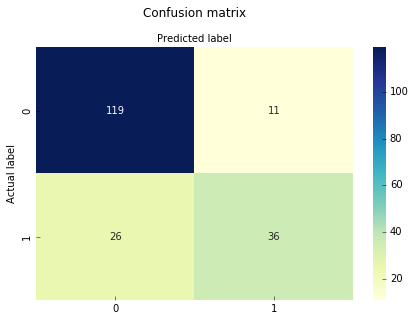

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.807291666667
Precision: 0.765957446809
Recall: 0.58064516129


We got a classification rate of 80%, considered as good accuracy.

**Precision:** Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

**Recall:** If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.

#### ROC Curve

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

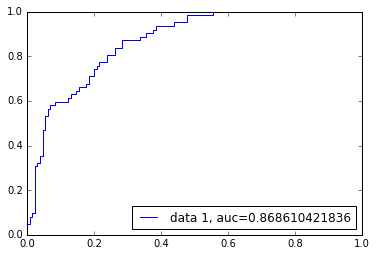

In [34]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.